In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
image_gen = ImageDataGenerator( rotation_range =30,
                              width_shift_range = 0.1,
                              height_shift_range = 0.1,
                               rescale = 1/255,
                               shear_range = 0.2,
                              horizontal_flip = True,
                              fill_mode = 'nearest')

In [9]:
test_gen = ImageDataGenerator(rescale = 1/255)

In [5]:
image_shape = (150, 150, 3)

In [6]:
batch_size = 16

In [12]:
train_img_gen = image_gen.flow_from_directory('./NewShelf/train',
                                              target_size = image_shape[:2],
                                              batch_size = batch_size,
                                              class_mode = 'binary'
                                             )

Found 304 images belonging to 2 classes.


In [10]:
val_img_gen = test_gen.flow_from_directory('./NewShelf/val',
                                           target_size = image_shape[:2],
                                          batch_size = batch_size,
                                          class_mode = 'binary')

Found 77 images belonging to 2 classes.


In [13]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten, MaxPool2D, Conv2D

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9248)             

In [20]:
result = model.fit_generator(train_img_gen,
                            epochs = 50,
                            steps_per_epoch = 10,
                            validation_data = val_img_gen,
                            validation_steps = 10
                            )

Epoch 1/50
10/10 [==============================] - 103s 10s/step - loss: 0.7472 - accuracy: 0.5250 - val_loss: 0.6619 - val_accuracy: 0.5325
Epoch 2/50
10/10 [==============================] - 60s 6s/step - loss: 0.6979 - accuracy: 0.5625 - val_loss: 0.8649 - val_accuracy: 0.4675
Epoch 3/50
10/10 [==============================] - 51s 5s/step - loss: 0.7263 - accuracy: 0.5125 - val_loss: 0.6847 - val_accuracy: 0.5714
Epoch 4/50
10/10 [==============================] - 52s 5s/step - loss: 0.6893 - accuracy: 0.5375 - val_loss: 0.6222 - val_accuracy: 0.5325
Epoch 5/50
10/10 [==============================] - 52s 5s/step - loss: 0.6982 - accuracy: 0.5500 - val_loss: 0.6737 - val_accuracy: 0.7013
Epoch 6/50
10/10 [==============================] - 51s 5s/step - loss: 0.7159 - accuracy: 0.5625 - val_loss: 0.6696 - val_accuracy: 0.5974
Epoch 7/50
10/10 [==============================] - 56s 6s/step - loss: 0.6772 - accuracy: 0.6313 - val_loss: 0.5894 - val_accuracy: 0.7792
Epoch 8/50
10/10 [

In [21]:
model.save('shelfEpoch50.h5')

In [22]:
result.history['accuracy']

[0.525,
 0.5625,
 0.5125,
 0.5375,
 0.55,
 0.5625,
 0.63125,
 0.65625,
 0.66875,
 0.70625,
 0.725,
 0.65,
 0.68125,
 0.65,
 0.6625,
 0.7,
 0.725,
 0.70625,
 0.6625,
 0.68125,
 0.75,
 0.75625,
 0.7125,
 0.65,
 0.76875,
 0.75,
 0.73125,
 0.71875,
 0.70625,
 0.71875,
 0.70625,
 0.725,
 0.7625,
 0.7375,
 0.71875,
 0.7625,
 0.8,
 0.7,
 0.7375,
 0.7375,
 0.76875,
 0.75625,
 0.73125,
 0.7875,
 0.775,
 0.775,
 0.76875,
 0.74375,
 0.78125,
 0.73125]

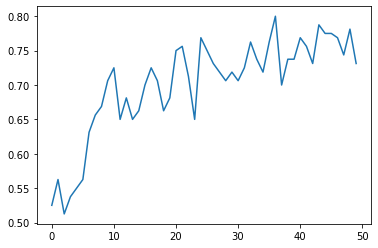

In [23]:
plt.plot(result.history['accuracy'])

In [32]:
img_size = 150
batch_holder = np.zeros((20, img_size, img_size, 3))
img_dir = './on 10-21-2019'
for i, img in enumerate(os.listdir(img_dir)):
    img = image.load_img(os.path.join(img_dir, img), target_size = (img_size, img_size))
    batch_holder[i:] = img
    

pred = model.predict_classes(batch_holder)

In [33]:
def label(pred):
    if pred == [0]:
        label = 'Empty'
    elif pred == [1]:
        label = 'Non Empty'
    return label

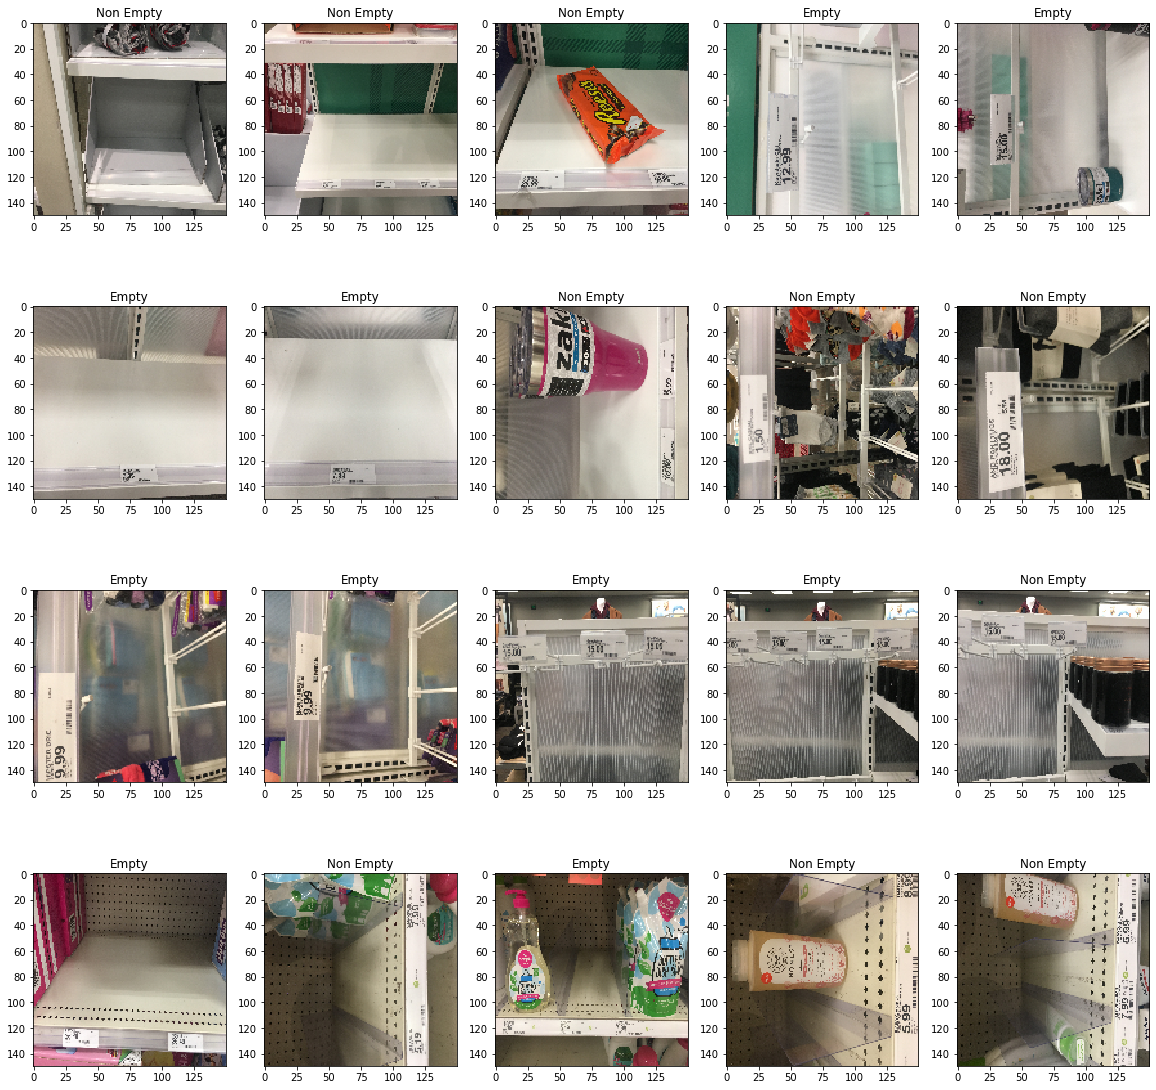

In [34]:
fig = plt.figure(figsize = (20,20))

for i, img in enumerate(batch_holder):
    fig.add_subplot(4,5, i+1)
    plt.title(label(pred[i][0]))
    plt.imshow(img/256)
    
plt.show()